In [31]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats

In [2]:
# Replaced 325 S with N value because outlier
number_of_sheets = 3
sheets = []
enzyme_data = []
dates = []
for i in range(number_of_sheets):
    sheets.append(pd.read_excel('../Data/Enzymes/Enzyme Activity.xlsx', sheet_name=i, engine='openpyxl'))
    if i == 0:
        first_date = sheets[0].columns.tolist()[7]
    sheets[i].columns = sheets[i].columns[:7].tolist() + [(sheets[i].columns[x] - first_date).days for x in range(7,len(sheets[i].columns))]
    enzyme_data.append(pd.melt(sheets[i], id_vars= ['Sample ID', 'Plot', 'ID', 'Block', 'Water', 'Nrate', 'Direction'], value_vars= sheets[i].columns[7:].tolist()))

In [3]:
nag_df = enzyme_data[0].loc[:,'Block':].rename(columns = {'value':'Activity(nmol/h/g)', 'variable':'Days'})
nag_df['Days'] = nag_df['Days'].astype('float64')
nag_df['Enzyme'] = 'NAG'
lap_df = enzyme_data[1].loc[:,'Block':].rename(columns = {'value':'Activity(nmol/h/g)', 'variable':'Days'})
lap_df['Enzyme'] = 'LAP'
lap_df['Days'] = lap_df['Days'].astype('float64')
phos_df = enzyme_data[2].loc[:,'Block':].rename(columns = {'value':'Activity(nmol/h/g)', 'variable':'Days'})
phos_df['Enzyme'] = 'PHOS'
phos_df['Days'] = phos_df['Days'].astype('float64')
all_enzymes = pd.concat([nag_df, lap_df, phos_df])
all_enzymes['Water'] = all_enzymes['Water'].replace({1:100, 2:70})

In [4]:
all_enzymes.head()

,Block,Water,Nrate,Direction,Days,Activity(nmol/h/g),Enzyme
0,1,100,1,N,0.0,51.791331,NAG
1,1,100,1,S,0.0,39.544701,NAG
2,1,100,5,N,0.0,30.662549,NAG
3,1,100,5,S,0.0,26.134131,NAG
4,1,100,6,N,0.0,32.620324,NAG


In [5]:
ttests = []
for water in set(all_enzymes['Water']):
    for nrate in set(all_enzymes['Nrate']):
        for day in set(all_enzymes['Days']):
            a = all_enzymes[(all_enzymes['Water'] == water) & (all_enzymes['Nrate'] == nrate) & 
                            (all_enzymes['Days'] == day) & (all_enzymes['Direction'] == 'N')]['Activity(nmol/h/g)']
            b = all_enzymes[(all_enzymes['Water'] == water) & (all_enzymes['Nrate'] == nrate) & 
                            (all_enzymes['Days'] == day) & (all_enzymes['Direction'] == 'S')]['Activity(nmol/h/g)']
            ttests.append(ttest_ind(a, b)[1])

In [6]:
ttest_df = pd.DataFrame(data = ttests)
print(ttest_df.std())
print(ttest_df.mean())
print(ttest_df.min())
print(ttest_df[ttest_df < 0.05].count())
print(len(ttest_df))

0    0.248007
dtype: float64
0    0.674645
dtype: float64
0    0.04768
dtype: float64
0    1
dtype: int64
48


In [7]:
# Average per plot = yes
# all_enzymes = all_enzymes.groupby(['Water','Nrate','Days','Enzyme']).mean().reset_index()

In [8]:
import warnings
warnings.filterwarnings('ignore')

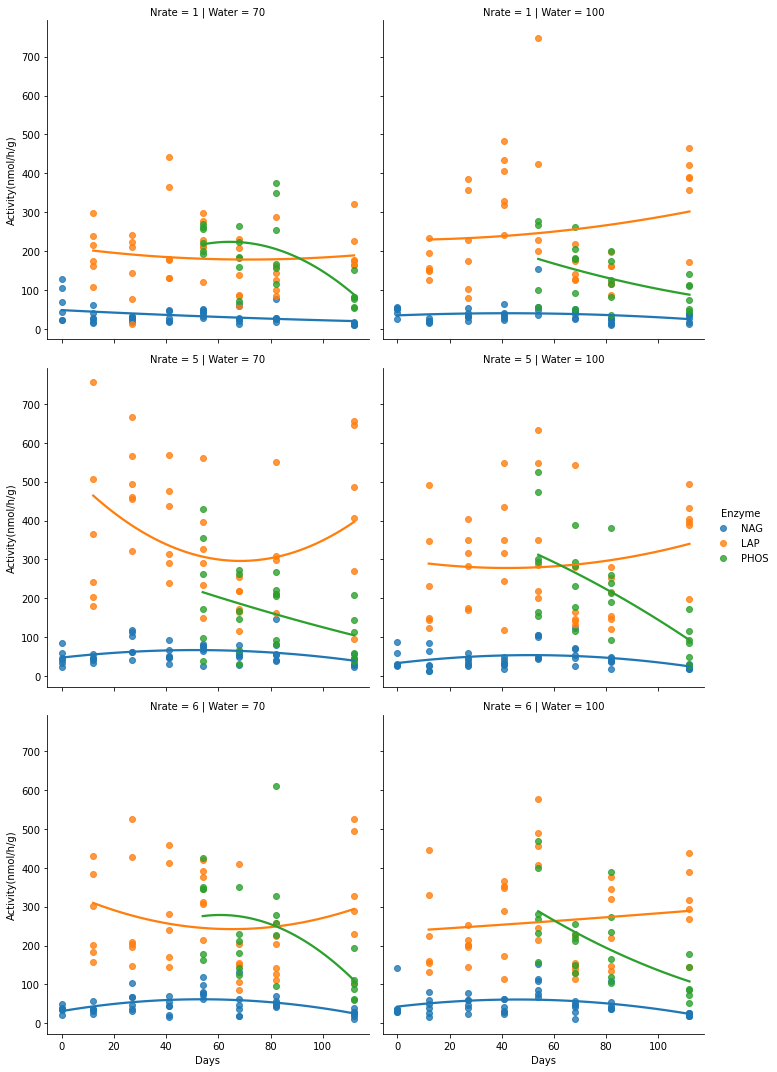

In [9]:
sns.lmplot(x = 'Days', y = 'Activity(nmol/h/g)', col = 'Water', hue = 'Enzyme', row = 'Nrate', order = 2, data = all_enzymes, ci = False)
plt.savefig('../Figures/Enzymes/NxWater_enzymes.jpg', dpi =300, format = 'jpg', bbox_inches = 'tight')

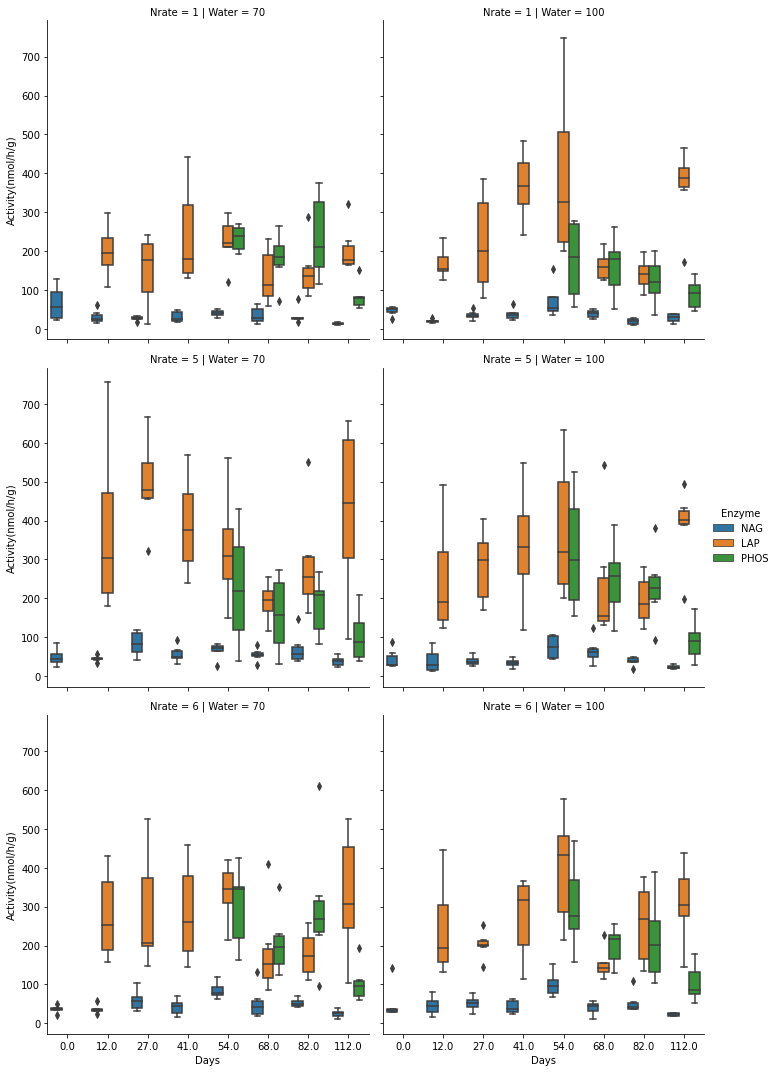

In [10]:
sns.catplot(x = 'Days', y = 'Activity(nmol/h/g)', col = 'Water', hue = 'Enzyme', row = 'Nrate', kind="box", data = all_enzymes)
plt.savefig('../Figures/Enzymes/NxWater_enzymes_boxplot.jpg', dpi =300, format = 'jpg', bbox_inches = 'tight')

In [11]:
all_enzymes.groupby(['Water','Nrate','Enzyme']).mean()

Block       Days  Activity(nmol/h/g)
Water Nrate Enzyme                                      
70    1     LAP         2  56.571429          186.164562
            NAG         2  49.500000           34.269967
            PHOS        2  79.000000          183.434098
      5     LAP         2  56.571429          356.070295
            NAG         2  49.500000           57.859220
            PHOS        2  79.000000          166.573126
      6     LAP         2  56.571429          267.632257
            NAG         2  49.500000           48.636189
            PHOS        2  79.000000          227.884190
100   1     LAP         2  56.571429          253.834943
            NAG         2  49.500000           35.992769
            PHOS        2  79.000000          133.459059
      5     LAP         2  56.571429          293.326441
            NAG         2  49.500000           44.319656
            PHOS        2  79.000000          221.853015
      6     LAP         2  56.571429          261.809275
            NAG         2  49.500000           50.652237
            PHOS        2  79.000000          204.758734

In [66]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [75]:
all_enzymes[all_enzymes['Nrate'] == 1]

,Block,Water,Nrate,Direction,Days,Activity(nmol/h/g),Enzyme
0,1,100,1,N,0.0,51.791331,NAG
1,1,100,1,S,0.0,39.544701,NAG
6,1,70,1,N,0.0,127.424181,NAG
7,1,70,1,S,0.0,70.049435,NAG
14,2,70,1,N,0.0,42.795491,NAG
...,...,...,...,...,...,...,...
131,2,100,1,S,112.0,140.932329,PHOS
136,3,70,1,N,112.0,80.666121,PHOS
137,3,70,1,S,112.0,56.299008,PHOS
138,3,100,1,N,112.0,113.981460,PHOS


In [96]:
data_dict_cat = []
data_dict_lower = []
data_dict_upper = []
for i in [1, 5, 6]:
    for enzyme in ['LAP','NAG','PHOS']:
        enzyme_data = all_enzymes[all_enzymes['Enzyme'] == enzyme]
        enzyme_data = enzyme_data[enzyme_data['Nrate'] == i]
        if i == 1:
            enzyme_data_tmp = enzyme_data.copy()
        lap_response_ratio = np.log(enzyme_data[enzyme_data['Water'] == 100]['Activity(nmol/h/g)'].values/enzyme_data[enzyme_data['Water'] == 70]['Activity(nmol/h/g)'].values)
        lap_response_ratio = lap_response_ratio[~np.isnan(lap_response_ratio)]
        confidence_interval = mean_confidence_interval(lap_response_ratio)
        data_dict_cat.append(enzyme + '_' + str(i))
        data_dict_lower.append(confidence_interval[1])
        data_dict_upper.append(confidence_interval[2])
dataset = pd.DataFrame({'Category':data_dict_cat, 'Lower':data_dict_lower, 'Upper': data_dict_upper})

Text(0.5, 0, 'Response ratio (ln[Full water/drought])')

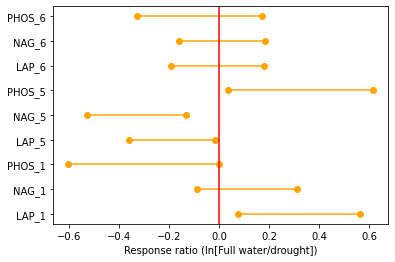

In [102]:
for lower,upper,y in zip(dataset['Lower'],dataset['Upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['Category']))
plt.axvline(x=0, color='r', linestyle='-')
plt.xlabel('Response ratio (ln[Full water/drought])')